**KELOMPOK 13**

Arion Syemael Siahaan

Firman Maulana

Razi Al-kindi

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('mhealth_raw_data.csv')

<ipython-input-4-07ab79936df6>:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('mhealth_raw_data.csv')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317506 entries, 0 to 317505
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   alx       317506 non-null  float64
 1   aly       317506 non-null  float64
 2   alz       317506 non-null  float64
 3   glx       317506 non-null  float64
 4   gly       317506 non-null  float64
 5   glz       317506 non-null  float64
 6   arx       317506 non-null  float64
 7   ary       317506 non-null  float64
 8   arz       317506 non-null  float64
 9   grx       317506 non-null  float64
 10  gry       317506 non-null  float64
 11  grz       317506 non-null  object 
 12  Activity  317505 non-null  float64
 13  subject   317505 non-null  object 
dtypes: float64(12), object(2)
memory usage: 33.9+ MB


In [6]:
df = df.drop(columns=['alx', 'aly', 'alz', 'arx', 'ary', 'arz', 'subject'])

In [7]:
df.head()

,glx,gly,glz,grx,gry,grz,Activity
0,0.103900,-0.84053,-0.68762,-0.44902,-1.0103,0.034483,0.0
1,0.085343,-0.83865,-0.68369,-0.44902,-1.0103,0.034483,0.0
2,0.085343,-0.83865,-0.68369,-0.44902,-1.0103,0.034483,0.0
3,0.085343,-0.83865,-0.68369,-0.45686,-1.0082,0.025862,0.0
4,0.085343,-0.83865,-0.68369,-0.45686,-1.0082,0.025862,0.0


<Axes: title={'center': 'Data Before sampling'}, xlabel='Activity'>

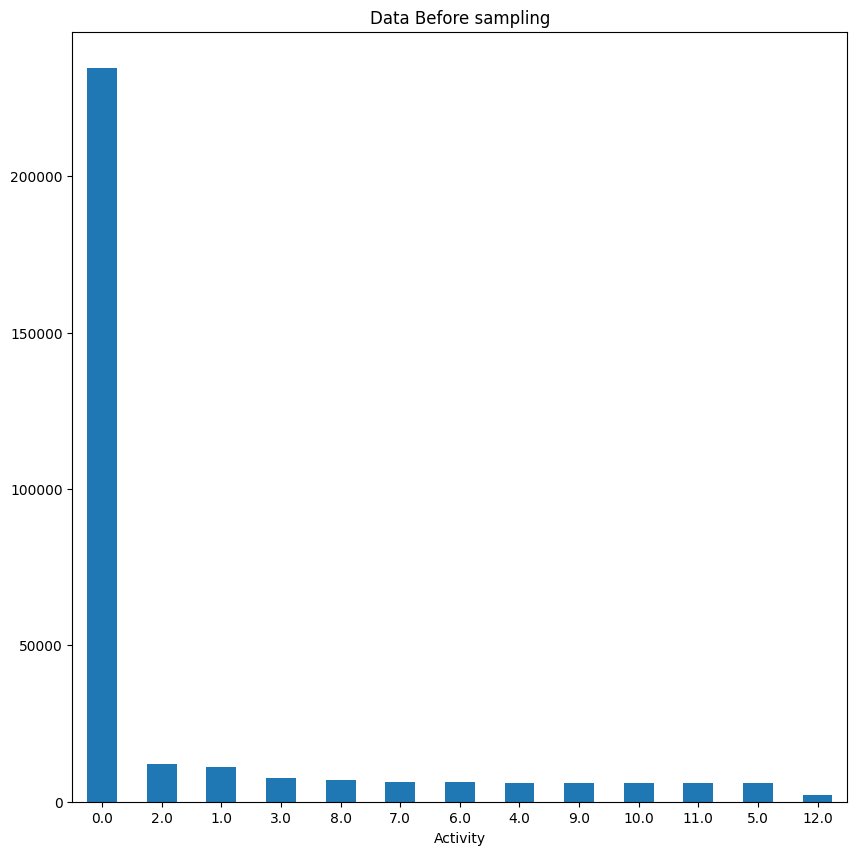

In [8]:
plt.figure(figsize=(10,10))
plt.title('Data Before sampling')
df['Activity'].value_counts().plot.bar(rot=0)

In [9]:
data_activity_0 = df[df['Activity'] == 0]
data_activity_else = df[df['Activity'] != 0]

data_activity_0 = data_activity_0.sample(n=40000, random_state=42)
df = pd.concat([data_activity_0, data_activity_else])

<Axes: title={'center': 'Data afetr sampling'}, xlabel='Activity'>

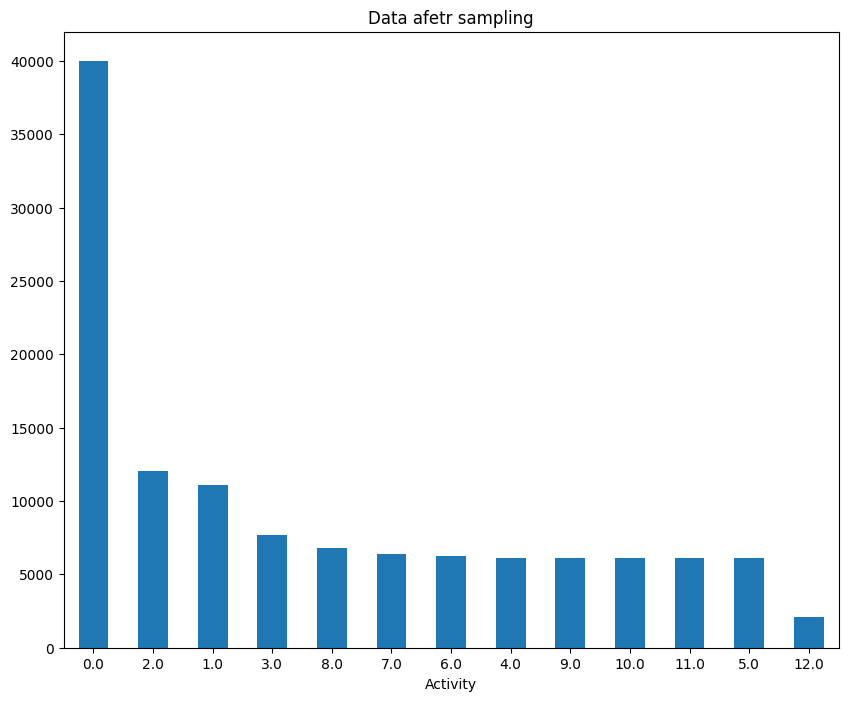

In [10]:
plt.figure(figsize=(10 ,8 ))
plt.title('Data afetr sampling')
df['Activity'].value_counts().plot.bar(rot=0)

In [11]:
activities_label = {
    0: "None",
    1: "Standing still (1 min)",
    2: "Sitting and relaxing (1 min)",
    3: "Lying down (1 min)",
    4: "Walking (1 min)",
    5: "Climbing stairs (1 min)",
    6: "Waist bends forward (20x)",
    7: "Frontal elevation of arms (20x)",
    8: "Knees bending (crouching) (20x)",
    9: "Cycling (1 min)",
    10: "Jogging (1 min)",
    11: "Running (1 min)",
    12: "Jump front & back (20x)"
}

In [12]:
df['Activity'] = df['Activity'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12],['None','Standing still (1 min)', 'Sitting and relaxing (1 min)', 'Lying down (1 min)', 'Walking (1 min)','Climbing stairs (1 min)','Waist bends forward (20x)','Frontal elevation of arms (20x)','Knees bending (crouching) (20x)','Cycling (1 min)','Jogging (1 min)','Running (1 min)','Jump front & back (20x)'])

In [13]:
df = df[df['Activity'].isin(['Standing still (1 min)', 'Sitting and relaxing (1 min)', 'Walking (1 min)'])]

In [14]:
df['Activity']

,Activity
6656,Standing still (1 min)
6657,Standing still (1 min)
6658,Standing still (1 min)
6659,Standing still (1 min)
6660,Standing still (1 min)
...,...
312895,Sitting and relaxing (1 min)
312896,Sitting and relaxing (1 min)
312897,Sitting and relaxing (1 min)
312898,Sitting and relaxing (1 min)


In [15]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['Activity']=labelencoder.fit_transform(df['Activity'])
df['Activity']

,Activity
6656,1
6657,1
6658,1
6659,1
6660,1
...,...
312895,0
312896,0
312897,0
312898,0


In [16]:
# Tentukan jumlah baris per input (20 baris per 50 Hz)
num_rows_per_input = 20

# Buat inputan 2D (20 baris digabungkan menjadi satu input)
inputs = []
for i in range(0, len(df) - num_rows_per_input + 1, num_rows_per_input):
    input_chunk = df.iloc[i:i + num_rows_per_input].values.flatten()  # Gabungkan 20 baris menjadi 1 array
    inputs.append(input_chunk)

# Ubah list ke numpy array untuk dipakai dalam model
inputs_array = np.array(inputs)

# Tampilkan bentuk data input
print("Bentuk data input untuk model:", inputs_array.shape)

Bentuk data input untuk model: (1462, 140)


In [17]:
inputs_array

array([[-0.20965, -0.88931, -0.50884, ..., -0.93224, '-0.34267', 1],
       [-0.20965, -0.8761700000000001, -0.51081, ..., -0.94045,
        '-0.35991', 1],
       [-0.19666, -0.8930600000000001, -0.50098, ..., -0.93224,
        '-0.34698', 1],
       ...,
       [0.71614, -0.49343, -0.73477, ..., -0.69405, -0.021552, 0],
       [0.73098, -0.49343, -0.7446, ..., -0.69815, -0.021552, 0],
       [0.73655, -0.49156, -0.73674, ..., -0.68172, 0.0043103, 0]],
      dtype=object)

In [18]:
def sig(x):
    return 1 / (1 + np.exp(-x))

def sigd(x):
    return sig(x) * (1 - sig(x))

In [19]:
def bp_fit(X, target, layer_conf, max_epoch, max_error=0.1, learn_rate=0.1, print_per_epoch=100):
    np.random.seed(1)
    nin = [np.empty(i) for i in layer_conf]
    n = [np.empty(j + 1) if i < len(layer_conf) - 1 else np.empty(j) for i, j in enumerate(layer_conf)]
    w = [np.random.rand(layer_conf[i] + 1, layer_conf[i + 1]) * 0.1 for i in range(len(layer_conf) - 1)]
    dw = [np.empty((layer_conf[i] + 1, layer_conf[i + 1])) for i in range(len(layer_conf) - 1)]
    d = [np.empty(s) for s in layer_conf[1:]]
    din = [np.empty(s) for s in layer_conf[1:-1]]

    epoch = 0
    mse = 1
    for i in range(0, len(n) - 1):
        n[i][-1] = 1  # Bias term

    while (max_epoch == -1 or epoch < max_epoch) and mse > max_error:
        epoch += 1
        mse = 0
        for r in range(len(X)):
            # Forward pass
            n[0][:-1] = X[r]
            for L in range(1, len(layer_conf)):
                nin[L] = np.dot(n[L - 1], w[L - 1])
                n[L][:len(nin[L])] = sig(nin[L])

            # Error calculation
            e = target[r] - n[-1]
            mse += np.mean(e ** 2)

            # Backpropagation
            d[-1] = e * sigd(nin[-1])  # Output layer delta
            dw[-1] = learn_rate * np.outer(n[-2], d[-1])

            for L in range(len(layer_conf) - 2, 0, -1):
                din[L - 1] = np.dot(d[L], w[L][:-1].T)
                d[L - 1] = din[L - 1] * sigd(nin[L])
                dw[L - 1] = learn_rate * np.outer(n[L - 1], d[L - 1])

            # Update weights
            for i in range(len(w)):
                w[i] -= dw[i]

        mse /= len(X)
        if print_per_epoch > -1 and epoch % print_per_epoch == 0:
            print(f'Epoch {epoch}, MSE: {mse}')
    return w, epoch, mse

In [20]:
def bp_predict(X, w):
    n = [np.empty(len(i)) for i in w]
    nin = [np.empty(len(i[0])) for i in w]
    predict = []

    n.append(np.empty(len(w[-1][0])))

    for x in X:
        n[0][:-1] = x

        for L in range(0, len(w)):
            nin[L] = np.dot(n[L], w[L])
            n[L + 1][:len(nin[L])] = sig(nin[L])

        predict.append(n[-1].copy())
    return predict

In [21]:
def onehot_enc(lbl, min_val=0):
    mi = min(lbl)
    enc = np.full((len(lbl), max(lbl) - mi + 1), min_val, np.int8)
    for i, x in enumerate(lbl):
        enc[i, x - mi] = 1
    return enc

def onehot_dec(enc, mi=0):
    return [np.argmax(e) + mi for e in enc]

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale, OneHotEncoder
from sklearn.metrics import accuracy_score

# Misalkan inputs_array adalah data input yang sudah diproses
# Ambil data X dan Y dari inputs_array (sesuaikan dengan data yang Anda miliki)
X = inputs_array[:, :-1]  # Semua kolom kecuali yang terakhir sebagai fitur
Y = inputs_array[:, -1]   # Kolom terakhir sebagai target

# One-hot encoding pada target
encoder = OneHotEncoder(sparse_output=False)
Y_encoded = encoder.fit_transform(Y.reshape(-1, 1))

# Normalisasi fitur X
X_scaled = minmax_scale(X)

# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_encoded, test_size=0.3, random_state=1)

# Cek jumlah fitur dalam data input X
num_features = X_train.shape[1]
print("Jumlah input:", num_features)
num_classes = Y_encoded.shape[1]
print("Jumlah kelas:", num_classes)

# Sesuaikan konfigurasi layer pertama dengan jumlah fitur
w, ep, mse = bp_fit(X_train, y_train, layer_conf=(num_features, 256, 128, 64, num_classes), learn_rate= 0.001, max_epoch=100, max_error=0.001, print_per_epoch=25)
print(f'Epochs: {ep}, MSE: {mse}')

# Prediksi data uji
predict = bp_predict(X_test, w)

# Dekode hasil prediksi dan label asli jika menggunakan one-hot encoding
predict = onehot_dec(predict)
y_test = onehot_dec(y_test)

# Hitung akurasi
accuracy = accuracy_score(predict, y_test)
print('Output:', predict)
print('True   :', y_test)
print('Accuracy:', accuracy)


Jumlah input: 139
Jumlah kelas: 3
